In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statistics import mean, variance, pvariance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from sklearn.cross_validation import train_test_split
from sklearn.utils import resample

In [23]:
data = pd.read_csv("processedlaptopinfo.csv", sep = ",")
data = data.sample(frac=1).reset_index(drop=True)

data = data.drop('Unnamed: 0', axis=1)

data = resample(data, n_samples = 470, random_state=0)

traindata, testdata = train_test_split(data, test_size=0.2, random_state=0)

# traindata = data[:-83]
# testdata = data[340:]

Xtrain = traindata.drop('Price', axis = 1)
ytrain = traindata[['Price']]

Xtest = testdata.drop('Price', axis = 1)
ytest = testdata[['Price']]

In [24]:
bag = BaggingRegressor(DecisionTreeRegressor(max_depth=20), n_estimators = 50)
bag.fit(Xtrain, ytrain.values.ravel())
ypredict = bag.predict(Xtest)
mean_absolute_error(ytest.values.ravel(), ypredict)

943494.6099290779

[2460000.0, -4079400.0, 38040.0, 909280.0, -456807.93650793843, 41400.0, -1238700.0, -3512000.0, 180200.0, 131260.0, -282920.0, 3091800.0, -576360.0, 10000.0, 788000.0, 1487600.0, -1833980.0, 682800.0, -682000.0, 15680.0, -62000.0, -1893160.0, 563900.0, -584600.0, 358800.0, 2711470.0, -200.0, -2372420.0, -665960.0, -26000.0, -77000.0, 736420.0, 1514400.0, -98000.0, -373980.0, -220720.0, -964560.0, 575820.0, 858020.0, -1206000.0, -193200.0, -4685200.0, 467220.0, -584600.0, 430680.0, 430680.0, -671000.0, 0.0, -233000.0, 10000.0, 0.0, 2711470.0, -178200.0, -173300.0, -754800.0, 815820.0, -2828380.0, -1996280.0, -139600.0, -2372420.0, 5136000.0, -1206000.0, -144000.0, 1429600.0, -1833980.0, -1996280.0, -138000.0, -686366.6666666679, 815820.0, 1675800.0, 288400.0, 2350831.111111108, -2372420.0, 148060.0, 1487600.0, -776000.0, 199800.0, -646140.0, -203000.0, 564000.0, -406400.0, 1061154.2857142836, -591600.0, 0.0, 1068333.333333332, 163000.0, 378800.0, -534400.0, -498600.0, -653600.0, 317800

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if __name__ == '__main__':


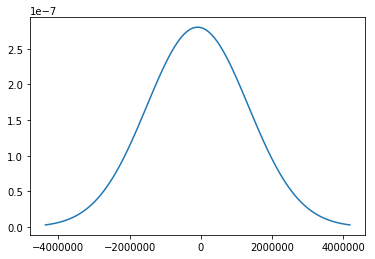

-92750.80715974343
2026424706275.6006
1423525.4498166165


In [26]:
err = []
for idx in range(len(ytest.values.ravel())):
    err.append(ytest.values.ravel()[idx]-ypredict[idx])
print (err)
mu = mean(err) #mean_absolute_error(flattentest, ypredict)
var = variance(err) #mean_squared_error(flattentest, ypredict)
sigma = math.sqrt(var)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
print (mu)
print (var)
print (sigma)